In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from scipy import optimize

from scipy import stats
%matplotlib inline

1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

In [13]:
def f1(b,c):
    a = (4-2.1*(b ** 2)+(b ** 4)/3)* b ** 2 + b*c + (4* (c ** 2) -4) * (c**2)
    return a

def f2(xa):
    return f1(xa[0],xa[1])


<ipython-input-15-b3a7f35ada90>:9: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


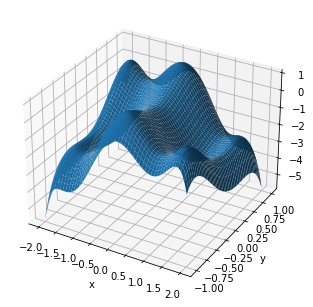

In [15]:
x = np.linspace(-2, 2, 1000)
y = np.linspace(-1, 1, 1000)


X, Y = np.meshgrid(x, y)
z =-1*f1(X,Y)

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X, Y, z)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [16]:
solution = optimize.minimize_scalar(f1, args=(5,))
print(solution)

     fun: 2393.204768472884
    nfev: 31
     nit: 26
 success: True
       x: -1.8511718515349764


In [49]:

resultados = []
for i in range(10):
    k = np.random.rand(2)
    minimo = optimize.minimize(f2, k)
    resultados.append([minimo["fun"], k] )

minimo = optimize.minimize(f2, [0,0])
resultados.append([minimo["fun"], [0,0]] )
pd.DataFrame(resultados)
#print(minimo["fun"])

,0,1
0,-1.031628,"[0.8611875832966317, 0.47768034553067074]"
1,-1.031628,"[0.7301308448614137, 0.9180014718671907]"
2,-1.031628,"[0.4451961568448083, 0.6142084155270641]"
3,-1.031628,"[0.203159503921988, 0.9028495712597517]"
4,-1.031628,"[0.004860658143939434, 0.14436338564727502]"
5,-1.031628,"[0.9146887834857924, 0.22134558289480888]"
6,-1.031628,"[0.7930345985608581, 0.04784215364273814]"
7,-1.031628,"[0.7424142244122918, 0.9006406890365718]"
8,-1.031628,"[0.19724749724599056, 0.9902297041935887]"
9,-1.031628,"[0.9602530396807749, 0.7428542127883466]"


2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

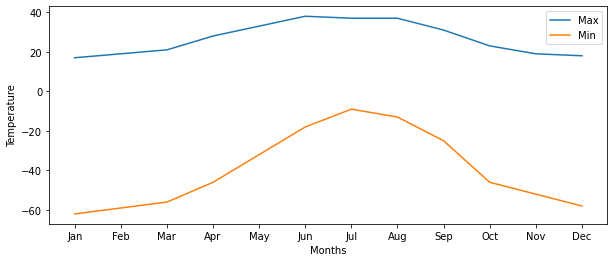

In [4]:
Tmax = [17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18]
Tmin =[-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58]
months = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
plt.figure(figsize=(10, 4));
plt.plot(months,Tmax,Tmin)
plt.xlabel('Months')
plt.ylabel('Temperature')
plt.legend(["Max","Min"])


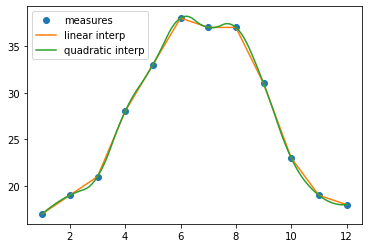

In [5]:
# import scipy.interpolate
from scipy.interpolate import interp1d
# 1D linear interpolation
linear_interp = interp1d(np.arange(1,13), Tmax)
# cubic interpolation
quadratic_interp = interp1d(np.arange(1,13), Tmax, kind='quadratic')


interpolation_time = np.linspace(1, 12, 111)
linear_results = linear_interp(interpolation_time)
quadratic_results = quadratic_interp(interpolation_time)


plt.plot(np.arange(1,13), Tmax, 'o', ms=6, label='measures')
plt.plot(interpolation_time, linear_results, label='linear interp')
plt.plot(interpolation_time, quadratic_results, label='quadratic interp')
plt.legend()



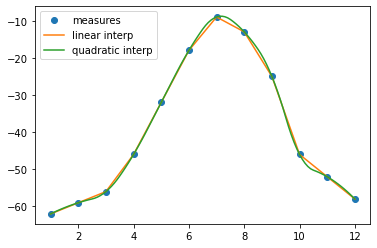

In [7]:
linear_interp = interp1d(np.arange(1,13), Tmin)
# cubic interpolation
quadratic_interp = interp1d(np.arange(1,13), Tmin, kind='quadratic')


interpolation_time = np.linspace(1, 12, 111)
linear_results = linear_interp(interpolation_time)
quadratic_results = quadratic_interp(interpolation_time)


plt.plot(np.arange(1,13), Tmin, 'o', ms=6, label='measures')
plt.plot(interpolation_time, linear_results, label='linear interp')
plt.plot(interpolation_time, quadratic_results, label='quadratic interp')
plt.legend()

In [25]:
def quadratic_function(E,a,b,c):
    b = (a*(E**2.0)) + (b*E) + c
    return b

parameters:
 [ -1.5034965   20.76223776 -93.18181818]
covariance matrix:
 [[ 7.27547549e-02 -9.45811808e-01  2.20689422e+00]
 [-9.45811808e-01  1.29745978e+01 -3.31034129e+01]
 [ 2.20689422e+00 -3.31034129e+01  1.03724026e+02]]
A = -1.50 +- 0.27
f = 20.76 +- 3.60


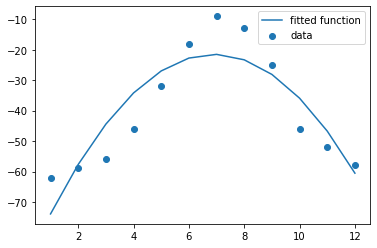

In [31]:
popt, pcov = optimize.curve_fit(quadratic_function, np.arange(1,13), Tmin, full_output=False)
print("parameters:\n", popt)
print("covariance matrix:\n", pcov)
print("A = %.2f +- %.2f" % (popt[0], np.sqrt(pcov[0,0])))
print("f = %.2f +- %.2f" % (popt[1], np.sqrt(pcov[1,1])))


plt.scatter(np.arange(1,13), Tmin, label='data')
plt.plot(np.arange(1,13), quadratic_function(np.arange(1,13), popt[0], popt[1],popt[2]), label='fitted function')
plt.legend(loc='best')

A: Seems that the selected function is way too simple compared to the data.

3\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature name "residual" contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable "distances".

- Considering only the "residual" feature, create an histogram with the appropriate binning and display it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

20
20


<ErrorbarContainer object of 3 artists>

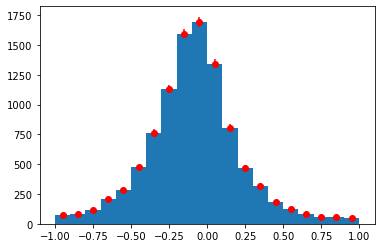

In [65]:
ndf = np.load("residuals_261.npy", allow_pickle=True)
df = pd.DataFrame(ndf.item())
res = ndf.item()["residuals"]
dist = ndf.item()["distances"]
n_bins = 20
range_res = df["residuals"].between(-1,1)

filtered_res = res[range_res]

hist, bins = np.histogram(filtered_res, bins=n_bins)

plt.hist(filtered_res,bins= n_bins)
error = np.sqrt(hist)
loc_error = (bins[:-1] + bins[1:])/2


print(loc_error.size)
print(hist.size)
plt.errorbar(loc_error, hist, yerr=error, fmt="o", color="red")


In [8]:
def gaussian_function(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

parameters:
 [ 1.60382695e+03 -8.83453356e-02 -2.27451488e-01]
covariance matrix:
 [[2.78457615e+03 1.61259192e-07 2.63273537e-01]
 [1.61259192e-07 7.46749239e-05 4.82059832e-11]
 [2.63273537e-01 4.82059832e-11 7.46751126e-05]]
A = 1603.83 +- 52.77
B = -0.09 +- 0.01
C = -0.23 +- 0.01


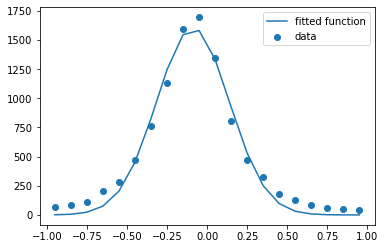

In [71]:
popt, pcov = optimize.curve_fit(gaussian_function, loc_error, hist, full_output=False)
print("parameters:\n", popt)
print("covariance matrix:\n", pcov)
print("A = %.2f +- %.2f" % (popt[0], np.sqrt(pcov[0,0])))
print("B = %.2f +- %.2f" % (popt[1], np.sqrt(pcov[1,1])))
print("C = %.2f +- %.2f" % (popt[2], np.sqrt(pcov[2,2])))



plt.scatter(loc_error, hist, label='data')
plt.plot(loc_error, gaussian_function(loc_error, popt[0], popt[1],popt[2]), label='fitted function')
plt.legend(loc='best')

In [76]:
residuals = hist - gaussian_function(loc_error, *popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((hist-np.mean(hist))**2)
rsq = 1 - ss_res / ss_tot

print("R2 =", rsq, "\nR =", np.sqrt(rsq))
print("Covariance matrix:\n", np.corrcoef(loc_error,hist)) # check with the correlation matrix that R is the correlation coefficient

R2 = 0.9772512106831859 
R = 0.988560170492007
Covariance matrix:
 [[ 1.         -0.13878785]
 [-0.13878785  1.        ]]


The fit presents good correlation with the histogram, it is supposedly a gaussian distribution.

4\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is necessary.

In [13]:
def f4(day,a,b,c):
    return a * np.cos(2 * np.pi * day + b) + c

In [28]:
def g4(day,a,b,c,d):
    return a * np.cos(2 * np.pi * day*b + c) + d

In [34]:
df = pd.read_csv("munich_temperatures_average_with_bad_data.txt",header = 0, delimiter = " ",names = ("Date", "Temperature"))
df = df[df['Date'] > 2008]
df = df[df['Date'] < 2012]

xdata = np.array(df["Date"])
ydata = np.array(df["Temperature"])
df


,Date,Temperature
4747,2008.00274,-2.94444
4748,2008.00548,-2.66667
4749,2008.00821,-2.66667
4750,2008.01095,-2.00000
4751,2008.01369,-1.94444
...,...,...
6203,2011.98836,3.44444
6204,2011.99110,1.27778
6205,2011.99384,2.88889
6206,2011.99658,1.83333


In [35]:
popt, pcov = optimize.curve_fit(f4, xdata, ydata, full_output=False)
print("parameters:\n", popt)
print("covariance matrix:\n", pcov)
print("a = %.2f +- %.2f" % (popt[0], np.sqrt(pcov[0,0])))
print("b = %.2f +- %.2f" % (popt[1], np.sqrt(pcov[1,1])))
print("c = %.2f +- %.2f" % (popt[2], np.sqrt(pcov[2,2])))

parameters:
 [-9.98813368 12.33302301  9.38411487]
covariance matrix:
 [[ 3.22599222e-02 -1.58887140e-07 -5.53379208e-08]
 [-1.58887140e-07  3.23390174e-04 -2.22783867e-08]
 [-5.53379208e-08 -2.22783867e-08  1.61303439e-02]]
a = -9.99 +- 0.18
b = 12.33 +- 0.02
c = 9.38 +- 0.13


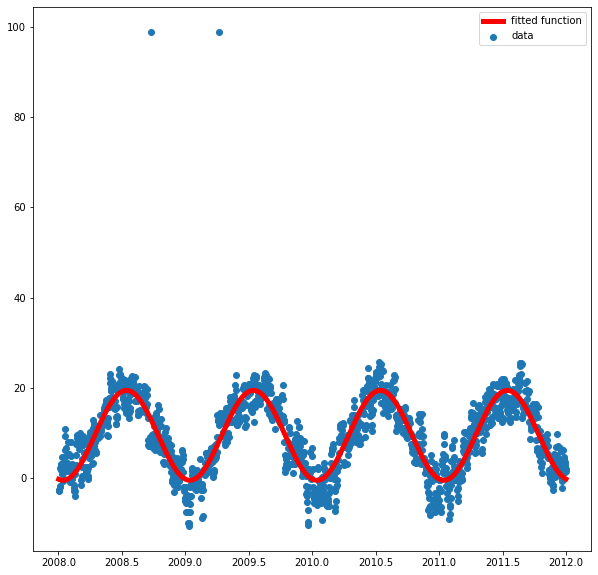

In [36]:
plt.figure(figsize=(10,10))
plt.scatter(xdata, ydata, label='data')
plt.plot(xdata, f4(xdata, popt[0], popt[1],popt[2]), label='fitted function',color="red",lw="5")
plt.legend(loc='best')


In [37]:
print("The average temperature is: ",np.average(f4(xdata, popt[0], popt[1],popt[2])))
print("The highest predicted temperature is: ",np.max(f4(xdata, popt[0], popt[1],popt[2])))
print("The highest predicted temperature is: ",np.min(f4(xdata, popt[0], popt[1],popt[2])))

print("The b parameter is: ",popt[1],"And it stands for the phase shift which corresponds to the start of the data")

The average temperature is:  9.384097738874166
The highest predicted temperature is:  19.372195561374692
The highest predicted temperature is:  -0.6037388688686196
The b parameter is:  12.333023014191797 And it stands for the phase shift which corresponds to the start of the data


In [38]:
poptg, pcovg = optimize.curve_fit(g4, xdata, ydata, full_output=False)
print("parameters:\n", poptg)
print("covariance matrix:\n", pcovg)
print("a = %.2f +- %.2f" % (poptg[0], np.sqrt(pcovg[0,0])))
print("b = %.2f +- %.2f" % (poptg[1], np.sqrt(pcovg[1,1])))
print("c = %.2f +- %.2f" % (poptg[2], np.sqrt(pcovg[2,2])))
print("d = %.2f +- %.2f" % (poptg[3], np.sqrt(pcovg[3,3])))

parameters:
 [-9.98218221  1.00144405 -5.90461088  9.39812483]
covariance matrix:
 [[ 3.25949945e-02 -4.84349208e-05  6.11703245e-01 -5.14186860e-04]
 [-4.84349205e-05  6.49715233e-06 -8.20547778e-02  6.28934632e-05]
 [ 6.11703242e-01 -8.20547778e-02  1.03629842e+03 -7.94302192e-01]
 [-5.14186857e-04  6.28934632e-05 -7.94302192e-01  1.67469820e-02]]
a = -9.98 +- 0.18
b = 1.00 +- 0.00
c = -5.90 +- 32.19
d = 9.40 +- 0.13


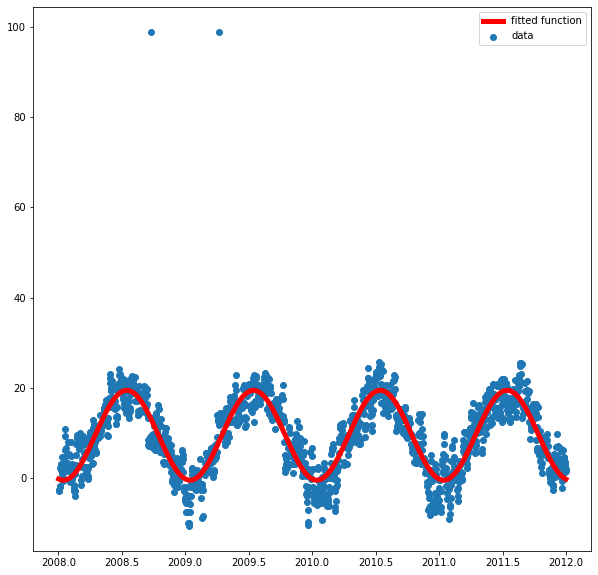

In [39]:
plt.figure(figsize=(10,10))
plt.scatter(xdata, ydata, label='data')
plt.plot(xdata, g4(xdata, poptg[0], poptg[1],poptg[2],poptg[3]), label='fitted function',color="red",lw="5")
plt.legend(loc='best')

In [41]:
residualsf = ydata - f4(xdata, *popt)
ss_resf = np.sum(residualsf**2)

residualsg = ydata - g4(xdata, *poptg)
ss_resg = np.sum(residualsg**2)

print("The residuals of the first function are: ",ss_resf,"and the second one: ",ss_resg)

The residuals of the first function are:  34359.85859996652 and the second one:  34352.794053755904


In [42]:
def Ftest(ssr_1, ssr_2, ndof_1, ndof_2, nbins, verbose=False):
    F = ((ssr_1 - ssr_2)/(ndof_2 - ndof_1)) / (ssr_2/(nbins - ndof_2))
    CL = 1. - stats.f.cdf(F, ndof_2 - ndof_1, nbins - ndof_2)
    if verbose: print("CL: %.3f" % CL, ", additional parameter necessary:", "YES" if CL < 0.10 else "NO")
    return CL

In [45]:
Ftest(ss_resf,ss_resg,3,4,20,verbose=True)

CL: 0.955 , additional parameter necessary: NO


0.9549674305973546